In [1]:
#import necessary packages

import numpy as np #This is used in ML Calculations
import pandas as pd #This is used for dataframes
import seaborn as sns #This is used for plotting
import matplotlib.pyplot as plt #This will help support plotting functions
from sklearn import datasets #Import JUST datasets from sklearn
from sklearn.linear_model import LinearRegression #Imports ML Tools for Linear Regression

#Import mean_squared_error and r^2 calculators from sklearn
from sklearn.metrics import mean_squared_error, r2_score

#Import func to randomly select a training/testing split of our data
from sklearn.model_selection import train_test_split

In [2]:
#We will import the diabetes dataset in two parts: ...
#... When using an sklearn dataset, two arrays are returned: --
#-- The first is the data used for prediction, and the second are "Correct Answers" --
#-- otherwise referred to as 'targets'. (These are what we want to predict)

#To format sklearn dataset imports, need 'data, target = datasets.load_(dataset here)'
#As a parameter, we will use (return_X_y = True) to separate the data from targets

diabetesData, diabetesTarget = datasets.load_diabetes(return_X_y = True)
diabetesTarget

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

In [3]:
diabetesData

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990749, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06833155, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286131, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04688253,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452873, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00422151,  0.00306441]])

In [4]:
#Step 1 of outline for using sklearn --> Prepare data for sklearn and linear regression

#Since linear regression only uses one feature for prediction, we need to pick a feature and separate it ...
#... from the rest of the data for ease of use

#I chose feature 2, but there's nothing special about it aside from the fact that it is numerical
diabetesX = diabetesData[:, np.newaxis, 2] #np.newaxis makes each obs its own array
diabetesXPlot = diabetesData[:, 2] #pulls out the column labeled 2 from 'somewhere (need this info)'
diabetesX

array([[ 0.06169621],
       [-0.05147406],
       [ 0.04445121],
       [-0.01159501],
       [-0.03638469],
       [-0.04069594],
       [-0.04716281],
       [-0.00189471],
       [ 0.06169621],
       [ 0.03906215],
       [-0.08380842],
       [ 0.01750591],
       [-0.02884001],
       [-0.00189471],
       [-0.02560657],
       [-0.01806189],
       [ 0.04229559],
       [ 0.01211685],
       [-0.0105172 ],
       [-0.01806189],
       [-0.05686312],
       [-0.02237314],
       [-0.00405033],
       [ 0.06061839],
       [ 0.03582872],
       [-0.01267283],
       [-0.07734155],
       [ 0.05954058],
       [-0.02129532],
       [-0.00620595],
       [ 0.04445121],
       [-0.06548562],
       [ 0.12528712],
       [-0.05039625],
       [-0.06332999],
       [-0.03099563],
       [ 0.02289497],
       [ 0.01103904],
       [ 0.07139652],
       [ 0.01427248],
       [-0.00836158],
       [-0.06764124],
       [-0.0105172 ],
       [-0.02345095],
       [ 0.06816308],
       [-0

In [5]:
diabetesXPlot

array([ 0.06169621, -0.05147406,  0.04445121, -0.01159501, -0.03638469,
       -0.04069594, -0.04716281, -0.00189471,  0.06169621,  0.03906215,
       -0.08380842,  0.01750591, -0.02884001, -0.00189471, -0.02560657,
       -0.01806189,  0.04229559,  0.01211685, -0.0105172 , -0.01806189,
       -0.05686312, -0.02237314, -0.00405033,  0.06061839,  0.03582872,
       -0.01267283, -0.07734155,  0.05954058, -0.02129532, -0.00620595,
        0.04445121, -0.06548562,  0.12528712, -0.05039625, -0.06332999,
       -0.03099563,  0.02289497,  0.01103904,  0.07139652,  0.01427248,
       -0.00836158, -0.06764124, -0.0105172 , -0.02345095,  0.06816308,
       -0.03530688, -0.01159501, -0.0730303 , -0.04177375,  0.01427248,
       -0.00728377,  0.0164281 , -0.00943939, -0.01590626,  0.0250506 ,
       -0.04931844,  0.04121778, -0.06332999, -0.06440781, -0.02560657,
       -0.00405033,  0.00457217, -0.00728377, -0.0374625 , -0.02560657,
       -0.02452876, -0.01806189, -0.01482845, -0.02991782, -0.04

In [6]:
#Step 2 --> choose the model we'll be using

theMethod = LinearRegression() #From sklearn (linear_models) use Linear Regression

In [7]:
#Step 3 --> train the model

#We have decided the method, let's build the model
#To build a model from data, we use the .fit func
#.fit takes in two inputs: trainingdata and targetdata
# *When we are doing supervised learning at least

theModel = theMethod.fit(diabetesX, diabetesTarget)

In [8]:
#Build the collection of predictions for every possible input
#Applies our model to the input data. To do so, we use the .predict func

diabetesPredictor = theMethod.predict(diabetesX)

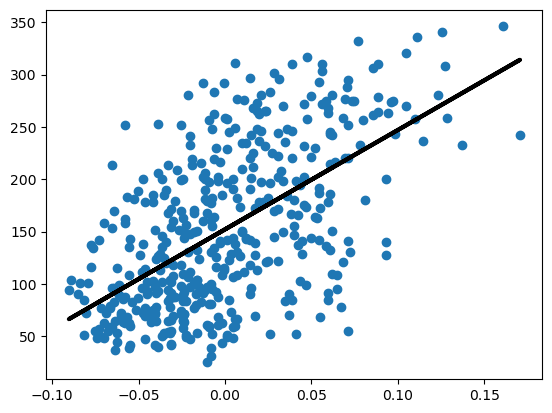

In [9]:
#Step 4 --> visualize the model

#Visualize the data so that we can better understand/explain the model that sklearn created
#plt calls matplotlib.pyplot, since we're comparing 2 numerical variables
#We will make a scatterplot
#In order to see the model, we will draw the line the model created

plt.scatter(diabetesX, diabetesTarget)
plt.plot(diabetesX, diabetesPredictor, color = 'black', linewidth = 3)

C:\Users\chtho\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


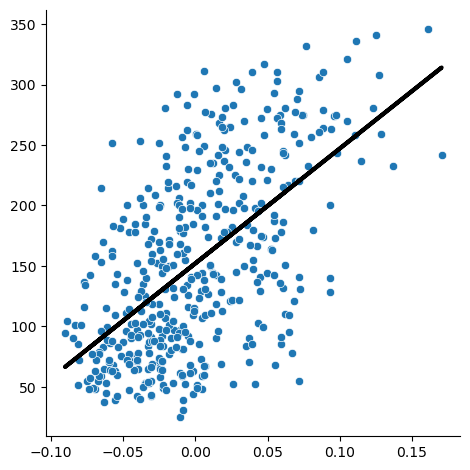

In [10]:
sns.relplot(x = diabetesXPlot, y = diabetesTarget)

#Note that we use plt to modify our sns plots with extra info, such as tossing in the line of best fit from the above graph
plt.plot(diabetesX, diabetesPredictor, color = 'black', linewidth = 3)
#we use diabetesXPlot since we want an array of floats for seaborn, ...
#... while for sklearn/matplotlib.pyplot, we can use diabetesX as it is an array of arrays

In [11]:
theMethod.predict([[0.104]])

array([250.87475124])

In [13]:
#print out the info for the model
#As a linear model, there are two parameters: the slope and the y-intercept

#Linear regression models will report the slope(s) of each input feature when you call 'coef_'
print('The slope of the line is: ', theMethod.coef_)
#LR models report intercept using 'intercept_'
print('The y-intercept of the line is: ', theMethod.intercept_)

The slope of the line is:  [949.43526038]
The y-intercept of the line is:  152.13348416289617


In [15]:
#To measure accuracy we can use mean squared error (which is what LR minimizes)
print('MSE:', mean_squared_error(diabetesTarget, diabetesPredictor))

#Or we can report back the r^2 value. This is way more typical
#Inputs for r2_score and mean_squared_error are Known Target Values, Predictions
print('r^2: ', r2_score(diabetesTarget, diabetesPredictor))
#Interpretation of r^2 is roughly the % of variation explained by your predictor variable (X)

MSE: 3890.456585461273
r^2:  0.3439237602253802


In [20]:
#Practice run two of using sklearn
#Step 1--> Testing/training split


#We use train_test_split to split our data into testing/training sets
#Outputs in order are: X training data, X testing data, Y training data, Y testing data (Put left of = sign)
#Inputs(AllData, AllTargets) ...
#... test_size --> percent(as decimal) of data for testing ...
#... shuffle = True --> forces it to randomize the selection so there's an unbiased set of in the training and testing sets ...
#... extra input so that others can recreate what you did: --
#-- random_state --> fixes the shuffle so that results are reproduceable 
diabXTrain, diabXTest, diabYTrain, diabYTest = train_test_split(diabetesX, 
                                                                diabetesTarget, 
                                                                test_size = 0.2,
                                                                random_state = 2626,
                                                                shuffle = True)

print('X Training:\n')
print(diabXTrain[: 3])

X Training:

[[ 0.11127556]
 [-0.02345095]
 [-0.00405033]]


In [21]:
#Step 2 --> choose the model
theMethod = LinearRegression()

In [23]:
#Step 3 --> Train the model with .fit
theModel = theMethod.fit(diabXTrain, diabYTrain)
#Somehow, at this point, the Machine Learning is done. It do be gud. But we should check it ... 
#... considering there's still some steps left over

In [26]:
#make predictiony shtuff
#Using the X training data to make predictions
trainPredictions = theMethod.predict(diabXTrain)

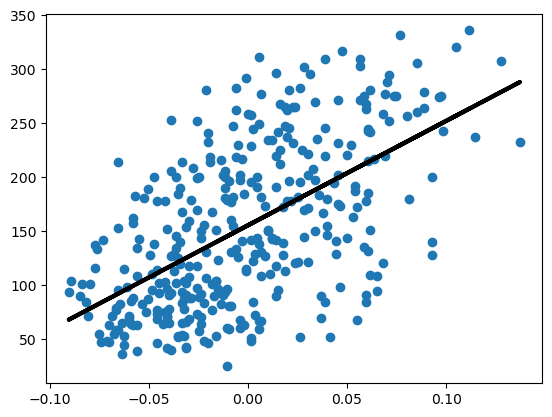

In [28]:
#step 4 --> visualize it
plt.scatter(diabXTrain, diabYTrain)
plt.plot(diabXTrain, trainPredictions, color = 'black', linewidth = 3)

In [29]:
#check accuracy (Currently just for training data)
#Standard to use r^2 for linear regression accuracy

print('r^2: ', r2_score(diabYTrain, trainPredictions))
#depending on the field, you have different thresholds for what is acceptable for r^2 values

r^2:  0.33973150514487205


In [30]:
#Now check accuaracy for testing data
#We can use '.predict' to make NEW guesses! This means our testing data can be put into '.predict'

testPredictions = theMethod.predict(diabXTest)

In [31]:
#For my predictions on testing data, most interested on what the residuals are
#These will give the info on HOW the model is missing the mark
#residuals = prediction - reality

residuals = testPredictions - diabYTest

print(residuals[:5])

[-22.15717869  -2.62130519  39.09381443 169.64955021  30.5200812 ]


C:\Users\chtho\AppData\Local\Temp\ipykernel_10312\2177904824.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals)


<Axes: ylabel='Density'>

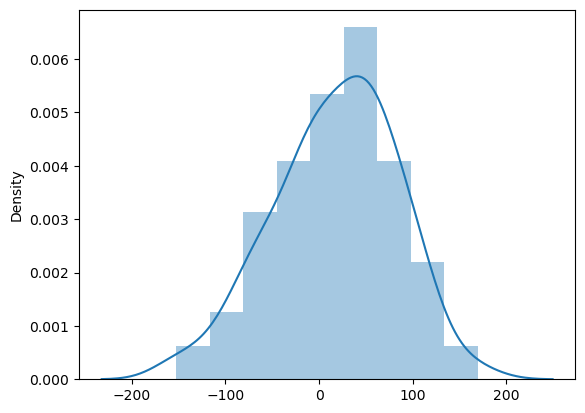

In [33]:
#We are interested in what the distribution of residuals is
#This tells us if we have some systematic erros that schoul be understood
sns.distplot(residuals)

In [ ]:
#Supervised Learning:
#- Supervised learning is a type of machine learning algorithm that learns from **labeled data**¹².
#- The machine is trained on a set of labeled data, which means that the input data is paired with the desired output¹.
#- The machine then learns to predict the output for new input data¹.
#- Supervised learning is often used for tasks such as classification, regression, and object detection¹.
#- For example, a labeled dataset of images of Elephant, Camel and Cow would have each image tagged with either “Elephant”, “Camel” or “Cow”¹.
#- The machine learns the relationship between inputs (fruit images) and outputs (fruit labels). The trained machine can then make predictions on new, unlabeled data¹.

#**Unsupervised Learning**:
#- Unsupervised learning uses machine learning algorithms to analyze and cluster **unlabeled data sets**².
#- The machine is trained on a set of unlabeled data, which means that the input data is not paired with the desired output¹.
#- The machine then learns to find patterns and relationships in the data¹.
#- Unsupervised learning is often used for tasks such as clustering, dimensionality reduction, and anomaly detection¹.
#- These algorithms discover hidden patterns in data without the need for human intervention².
#- For example, K-means clustering algorithms assign similar data points into groups, where the K value represents the size of the grouping and granularity².

In summary, the main difference between supervised and unsupervised learning is that supervised learning uses labeled data to predict outputs, while unsupervised learning uses unlabeled data to find patterns¹².
